In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import shapefile
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch

ems = pd.read_csv('mfdems.csv') # EMS Calls for Service Milwaukee
ald_shp = shapefile.Reader("./shape/ald2018/alderman")

In [2]:
# plots a comparison of MKE aldermanic districts based on the input parameter, call_type
def plot_ems_on_mke_ald_map(ems_call):
    plt.figure(figsize=(12,10))
    plt.title(ems_call.columns[0])
    ax = plt.axes()
    ax.set_aspect('equal')
    irec = 0

    for shape in list(ald_shp.iterShapes()):
        rec = ald_shp.record(irec)
        # define polygon fill color (facecolor) RGB values:
        R = ems_call.pct[float(rec[1])] / max(ems_call.pct) # percentage value for alderman district
        G = 0.1
        B = 0.1
        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0=shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)
                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=1.0, zorder=2)
                ax.add_patch(patch)
        center_x = shape.bbox[0]+((shape.bbox[2]-shape.bbox[0])/2)
        center_y = shape.bbox[1]+((shape.bbox[3]-shape.bbox[1])/2)
        ax.annotate(rec[1],xy=(center_x,center_y),color='tan',
                    ha='center',va='center',fontsize=22)
        irec = irec+1
    
    plt.xlim(ald_shp.bbox[0],ald_shp.bbox[2])
    plt.ylim(ald_shp.bbox[1],ald_shp.bbox[3])
    plt.axis('off')


C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


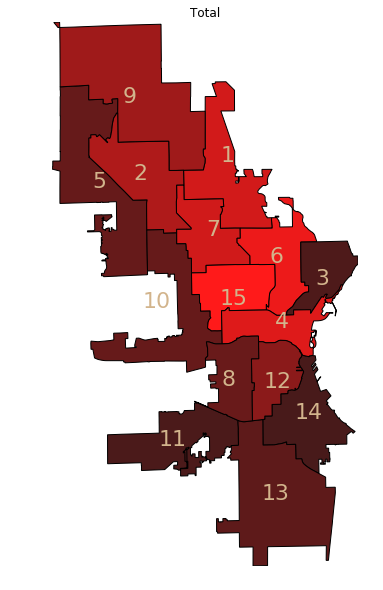

In [3]:
# MKE EMS calls - total
df = ems[['Aldermanic District','Final Call for Service Type']].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
df.columns = ['Total']
df['pct'] = df['Total'] / sum(df['Total'])
plot_ems_on_mke_ald_map(df)

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


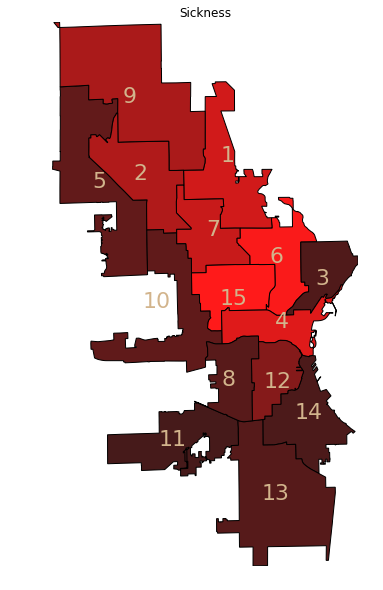

In [4]:
# MKE EMS calls related to sick ppl
df = ems[ems['Final Call for Service Type']=='Sick Person (Specific Diagnosis)'].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
df.columns = ['Sickness']
df['pct'] = df['Sickness'] / sum(df['Sickness'])
plot_ems_on_mke_ald_map(df)

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


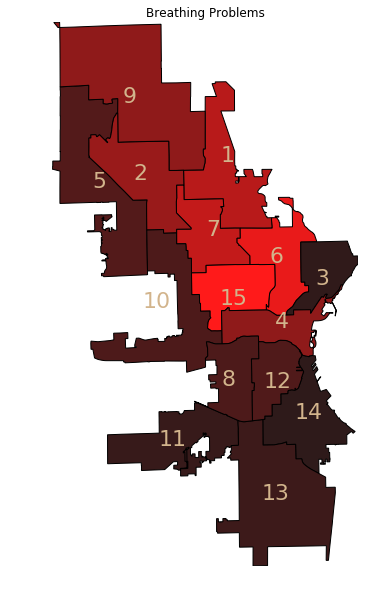

In [5]:
# MKE EMS calls related to breathing problems
df = ems[ems['Final Call for Service Type']=='Breathing Problems'].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
df.columns = ['Breathing Problems']
df['pct'] = df['Breathing Problems'] / sum(df['Breathing Problems'])
plot_ems_on_mke_ald_map(df)

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


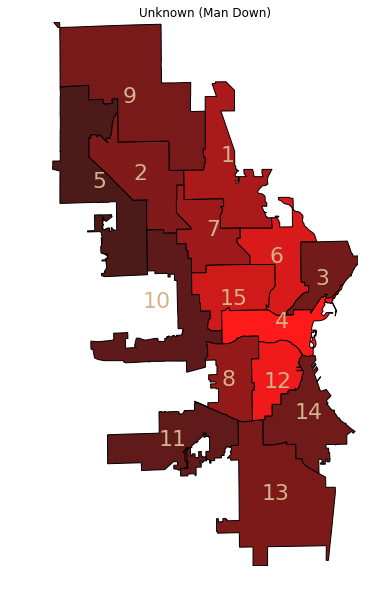

In [6]:
# MKE EMS calls related to breathing problems
df = ems[ems['Final Call for Service Type']=='Unknown Problem (Man Down)'].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
df.columns = ['Unknown (Man Down)']
df['pct'] = df['Unknown (Man Down)'] / sum(df['Unknown (Man Down)'])
plot_ems_on_mke_ald_map(df)

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


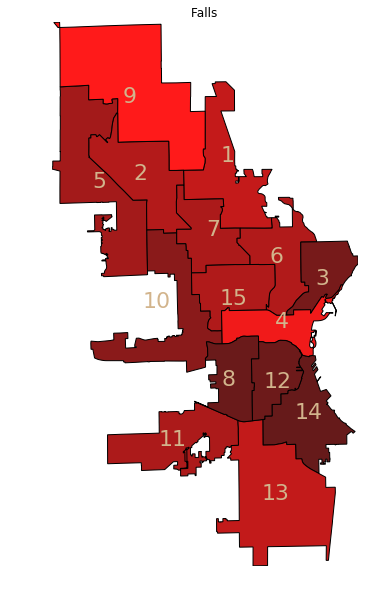

In [7]:
# MKE EMS calls related to breathing problems
df = ems[ems['Final Call for Service Type']=='Falls'].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
df.columns = ['Falls']
df['pct'] = df['Falls'] / sum(df['Falls'])
plot_ems_on_mke_ald_map(df)

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


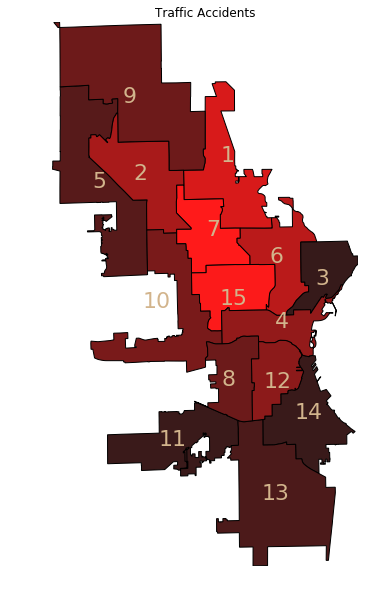

In [8]:
# MKE EMS calls related to breathing problems
df = ems[ems['Final Call for Service Type']=='Traffic/Transportation Accidents'].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
df.columns = ['Traffic Accidents']
df['pct'] = df['Traffic Accidents'] / sum(df['Traffic Accidents'])
plot_ems_on_mke_ald_map(df)

In [9]:
##TODO: compare number of elderly with number of falls by aldermanic district
